In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPool2D
from keras.utils import to_categorical
from keras import backend as K
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

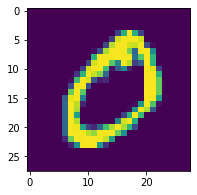

In [3]:
plt.figure(1, figsize=(3,3))
plt.imshow(x_train[1])
plt.show()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
pca = PCA()

In [7]:
x_train_flattened = x_train.flatten().reshape(60000, (28*28))

In [8]:
x_train_flattened.shape

(60000, 784)

In [9]:
x_test_flattened = x_test.flatten().reshape(10000, (28*28))

In [10]:
x_test_flattened.shape

(10000, 784)

In [11]:
X_Train = pca.fit_transform(x_train_flattened)

In [12]:
X_Train

array([[ 1.23932589e+02, -3.12674262e+02, -2.45140518e+01, ...,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 1.01171838e+03, -2.94857038e+02,  5.96339561e+02, ...,
        -3.24052475e-13,  1.78172504e-16,  2.00420574e-13],
       [-5.18496080e+01,  3.92173153e+02, -1.88509749e+02, ...,
         4.78984308e-13,  1.79199689e-13, -1.40374333e-13],
       ...,
       [-1.78053450e+02,  1.60078211e+02, -2.57613082e+02, ...,
         2.55207042e-15, -1.02051893e-16,  7.80137327e-16],
       [ 1.30606072e+02, -5.59193642e+00,  5.13858674e+02, ...,
         1.41557930e-16, -4.54520614e-16, -9.61080088e-16],
       [-1.73435952e+02, -2.47188023e+01,  5.56018894e+02, ...,
         4.19737278e-16,  1.47877326e-16,  4.71521549e-16]])

In [13]:
pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

Text(0.5, 1.0, 'MNIST Dataset Explained Variance')

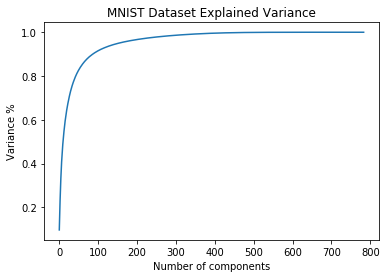

In [14]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Variance %")
plt.title("MNIST Dataset Explained Variance")

In [15]:
pca_95 = PCA(0.95)

In [16]:
x_train_95 = pca_95.fit_transform(x_train_flattened)

In [17]:
pca_95.n_components_

154

In [18]:
approx = pca_95.inverse_transform(x_train_95)

In [19]:
approx.shape

(60000, 784)

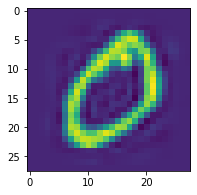

In [20]:
approx_images = approx.reshape(60000, 28, 28)
plt.figure(1, figsize=(3,3))
plt.imshow(approx_images[1])
plt.show()

In [21]:
pca_2 = PCA(n_components=2)

In [22]:
x_train_2 = pca_2.fit_transform(x_train_flattened)

In [23]:
approx_2 = pca_2.inverse_transform(x_train_2)

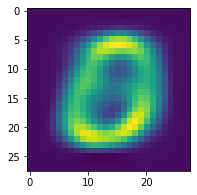

In [24]:
approx_2_images = approx_2.reshape(60000, 28, 28)
plt.figure(1, figsize=(3,3))
plt.imshow(approx_2_images[1])
plt.show()

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

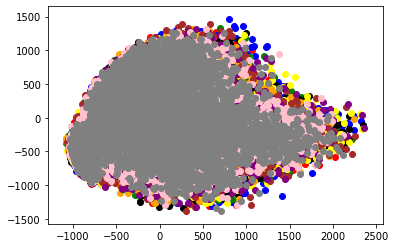

In [26]:
plt.scatter(x_train_95[:6000,0], x_train_95[:6000,1], c='red')
plt.scatter(x_train_95[6000:12000,0], x_train_95[6000:12000,1], c='blue')
plt.scatter(x_train_95[12000:18000,0], x_train_95[12000:18000,1], c='green')
plt.scatter(x_train_95[18000:24000,0], x_train_95[18000:24000,1], c='black')
plt.scatter(x_train_95[24000:30000,0], x_train_95[24000:30000,1], c='yellow')
plt.scatter(x_train_95[30000:36000,0], x_train_95[30000:36000,1], c='orange')
plt.scatter(x_train_95[36000:42000,0], x_train_95[36000:42000,1], c='brown')
plt.scatter(x_train_95[42000:48000,0], x_train_95[42000:48000,1], c='purple')
plt.scatter(x_train_95[48000:54000,0], x_train_95[48000:54000,1], c='pink')
plt.scatter(x_train_95[54000:60000,0], x_train_95[54000:60000,1], c='grey')

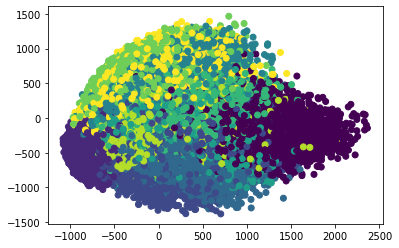

In [27]:
plt.scatter(x_train_95[:,0], x_train_95[:,1], c=y_train/2.1)

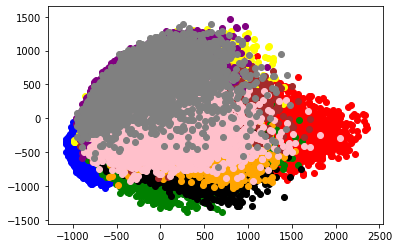

In [28]:
zeros = []
ones = []
twos = []
threes = []
fours = []
fives = []
sixes = []
sevens = []
eights = []
nines = []
for i in range(len(y_train)):
    if(y_train[i] == 0):
        zeros.append(i)
    elif(y_train[i] == 1):
        ones.append(i)
    elif(y_train[i] == 2):
        twos.append(i)
    elif(y_train[i] == 3):
        threes.append(i)
    elif(y_train[i] == 4):
        fours.append(i)
    elif(y_train[i] == 5):
        fives.append(i)
    elif(y_train[i] == 6):
        sixes.append(i)
    elif(y_train[i] == 7):
        sevens.append(i)
    elif(y_train[i] == 8):
        eights.append(i)
    elif(y_train[i] == 9):
        nines.append(i)
        
plt.scatter(x_train_95[zeros,0], x_train_95[zeros,1], c='red')
plt.scatter(x_train_95[ones,0], x_train_95[ones,1], c='blue')
plt.scatter(x_train_95[twos,0], x_train_95[twos,1], c='green')
plt.scatter(x_train_95[threes,0], x_train_95[threes,1], c='black')
plt.scatter(x_train_95[fours,0], x_train_95[fours,1], c='yellow')
plt.scatter(x_train_95[fives,0], x_train_95[fives,1], c='orange')
plt.scatter(x_train_95[sixes,0], x_train_95[sixes,1], c='brown')
plt.scatter(x_train_95[sevens,0], x_train_95[sevens,1], c='purple')
plt.scatter(x_train_95[eights,0], x_train_95[eights,1], c='pink')
plt.scatter(x_train_95[nines,0], x_train_95[nines,1], c='grey')

In [29]:
pca_90 = PCA(0.9)

In [30]:
pca.fit_transform(x_train.flatten().reshape(60000,28*28))

array([[ 1.23932589e+02, -3.12674262e+02, -2.45140518e+01, ...,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 1.01171838e+03, -2.94857038e+02,  5.96339561e+02, ...,
        -3.24052475e-13,  1.78172504e-16,  2.00420574e-13],
       [-5.18496080e+01,  3.92173153e+02, -1.88509749e+02, ...,
         4.78984308e-13,  1.79199689e-13, -1.40374333e-13],
       ...,
       [-1.78053450e+02,  1.60078211e+02, -2.57613082e+02, ...,
         2.55207042e-15, -1.02051893e-16,  7.80137327e-16],
       [ 1.30606072e+02, -5.59193642e+00,  5.13858674e+02, ...,
         1.41557930e-16, -4.54520614e-16, -9.61080088e-16],
       [-1.73435952e+02, -2.47188023e+01,  5.56018894e+02, ...,
         4.19737278e-16,  1.47877326e-16,  4.71521549e-16]])

In [31]:
model = Sequential()

In [32]:
model.add(Convolution2D(32,3,3,activation = 'relu', input_shape = (28,28,1)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


In [33]:
K.image_data_format()

'channels_last'

In [34]:
x_train = x_train.reshape(60000,28,28,1)

In [35]:
x_test = x_test.reshape(10000,28,28,1)

In [36]:
model.add(MaxPool2D(pool_size=(2,2)))

In [37]:
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(128, activation= 'relu'))

In [40]:
model.add(Dropout(0.5))

In [41]:
model.add(Dense(10, activation= 'softmax'))

In [42]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [43]:
y_train = to_categorical(y_train)

In [44]:
x_train = x_train/255

In [45]:
x_test = x_test/255

In [46]:
model.fit(x_train,y_train, epochs=20, validation_data=(x_test, to_categorical(y_test)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.2855 - accuracy: 0.9140 - val_loss: 0.0805 - val_accuracy: 0.9730
Epoch 2/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.1256 - accuracy: 0.9625 - val_loss: 0.0526 - val_accuracy: 0.9823
Epoch 3/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.0966 - accuracy: 0.9718 - val_loss: 0.0438 - val_accuracy: 0.9849
Epoch 4/20
60000/60000 [==============================] - 24s 396us/step - loss: 0.0810 - accuracy: 0.9753 - val_loss: 0.0481 - val_accuracy: 0.9844
Epoch 5/20
60000/60000 [==============================] - 24s 392us/step - loss: 0.0712 - accuracy: 0.9782 - val_loss: 0.0416 - val_accuracy: 0.9868
Epoch 6/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0385 - val_accuracy: 0.9867
Epoch 7/20
60000/60000 [==============================] 